# *Tutorial: Plotting peaks*

**Author:** [Eivind Tøstesen](https://github.com/eivindtostesen)

**Tutorial goal:** *How to plot peak analysis results using an interface to Matplotlib.*

## Introduction

*The results of a hierarchical analysis of peaks in 1D data are organized in a `Tree` object.
It can always be printed (str and repr), but a better way of visualizing and exploring the results is to make plots.*

*This notebook demonstrates the plot types provided by `interface_matplotlib`, which is a module that equips `Tree` objects with methods built on matplotlib, and gives some example recipes.*

## Imports
Importing the optional module `peakoscope.interface_matplotlib` provides what you need for plotting.

In [1]:
from matplotlib.pyplot import plot
%matplotlib inline

import peakoscope
import peakoscope.interface_matplotlib # requires matplotlib

# We also document our random seed value: 
RANDOM_SEED = "It's..."

## Example data set
Throughout this notebook, we will use the same mini example for our data set. It consists of two lists: a list `X` of labels (of data type int) and a list `Y` of values (of data type float).

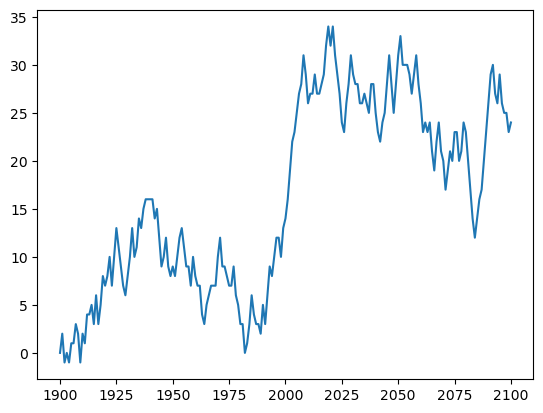

In [2]:
# Generate the synthetic data set:
X, Y = peakoscope.example_2(randomseed=RANDOM_SEED)

# Plot the data set:
plot(X, Y);

## Peak analysis
The peak regions in the data `X,Y` are analysed by calling `peakoscope.tree(Y)`. This function returns a `Tree` object, in which the tree nodes are objects of the `Scope` class. A `Scope` represents a peak and is written in the slice notation (start:stop), which specifies the peak region.

In [3]:
# Generate the data set:
X, Y = peakoscope.example_2(randomseed=RANDOM_SEED)

# Get the peak analysis results:
peaks = peakoscope.tree(Y)

# print the tree of peaks:
print(peaks)

0:201
├─10:201
│ ├─83:201
│ │ └─84:201
│ │   ├─90:201
│ │   │ ├─92:201
│ │   │ │ └─93:201
│ │   │ │   ├─95:201
│ │   │ │   │ ├─99:201
│ │   │ │   │ │ ├─99:184
│ │   │ │   │ │ │ └─100:184
│ │   │ │   │ │ │   └─101:183
│ │   │ │   │ │ │     └─102:183
│ │   │ │   │ │ │       ├─102:171
│ │   │ │   │ │ │       │ ├─103:166
│ │   │ │   │ │ │       │ │ └─103:165
│ │   │ │   │ │ │       │ │   ├─104:142
│ │   │ │   │ │ │       │ │   │ ├─105:126
│ │   │ │   │ │ │       │ │   │ │ └─105:125
│ │   │ │   │ │ │       │ │   │ │   └─106:125
│ │   │ │   │ │ │       │ │   │ │     ├─111:125
│ │   │ │   │ │ │       │ │   │ │     │ ├─116:124
│ │   │ │   │ │ │       │ │   │ │     │ │ └─117:124
│ │   │ │   │ │ │       │ │   │ │     │ │   └─118:123
│ │   │ │   │ │ │       │ │   │ │     │ │     └─118:122
│ │   │ │   │ │ │       │ │   │ │     │ │       ├─119:120
│ │   │ │   │ │ │       │ │   │ │     │ │       └─121:122
│ │   │ │   │ │ │       │ │   │ │     │ └─113:114
│ │   │ │   │ │ │       │ │   │ │     └─106:1

Plotting functionality is then initialized by calling the `TreeMatPlotLib` class. This will give the `peaks` an attribute called "plot".

One plot element (the "crown") requires the slices of `X` and `Y` for each peak region. Therefore, during `TreeMatPlotLib` instantiation, the two optional parameters `slice_of_x` and `slice_of_y` can be set.


In [4]:
# Generate the data set:
X, Y = peakoscope.example_2(randomseed=RANDOM_SEED)
# Get the peak analysis results:
peaks = peakoscope.tree(Y)

# add plotting tools:
peakoscope.interface_matplotlib.TreeMatPlotLib(
    peaks,
    X=X,
    Y=Y,
    slice_of_x={n: n.subarray(X) for n in peaks},
    slice_of_y={n: n.subarray(Y) for n in peaks},
)

# The new attribute:
peaks.plot

## The Bounding Boxes plot
The method `peaks.plot.bounding_boxes` draws a bounding box around each peak.

A bounding box is defined by intervals on the x-axis and y-axis. The intervals are stored as two data attributes:
-  `peaks.plot.xinterval` a dict containing start and end of each peak region
-  `peaks.plot.yinterval` a dict containing the interval from `min` to `max` of each peak

`peaks.plot.bounding_boxes` iterates over each peak in the input argument (or, if no argument is given, over all peaks in the tree). Let us plot all peaks at a certain size, by giving as argument: `peaks.size_filter(maxsize=7.0)`.

`peaks.plot.ax` is the Axes instance. It has Matplotlib's usual methods for manipulating the plot. We use it to set a title and include a lines plot of the data set `X,Y`. 

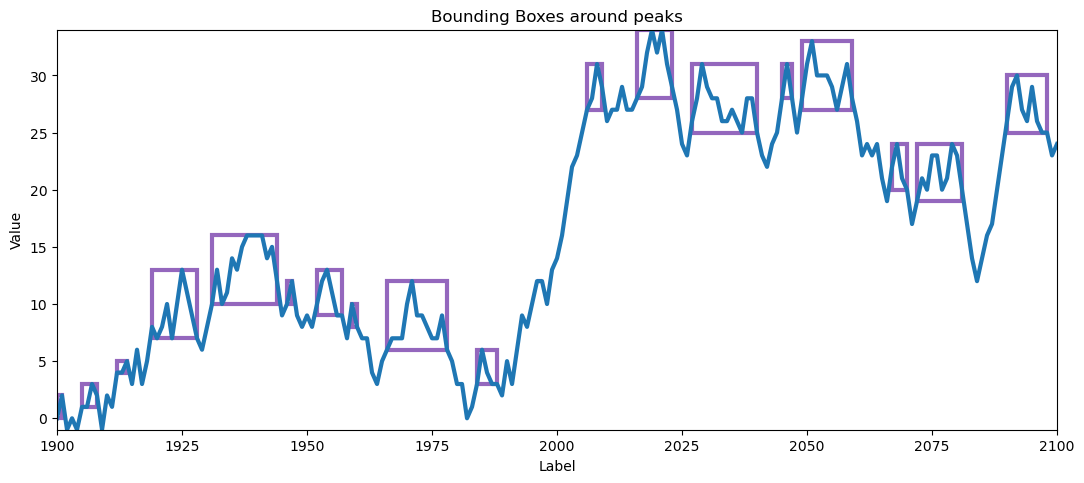

In [5]:
# Generate the data set:
X, Y = peakoscope.example_2(randomseed=RANDOM_SEED)
# Get the peak analysis results:
peaks = peakoscope.tree(Y)
# add plotting tools:
peakoscope.interface_matplotlib.TreeMatPlotLib(
    peaks,
    X=X,
    Y=Y,
)

# Plot bounding boxes:
peaks.plot.bounding_boxes(peaks.size_filter(maxsize=7.0))

# Set title of the plot:
peaks.plot.ax.set_title('Bounding Boxes around peaks')

# Plot the data set as lines:
peaks.plot.ax.plot(X, Y, linewidth=3);

## The Crowns plot
The `peaks.plot.crowns` method draws a colored area (called a crown) on each peak.

The crown is the area above the cutoff line of the peak and below the graph of data.

`peaks.plot.crowns` iterates over each peak in the input argument. As in the previos plot, let us plot all peaks at a certain size: `peaks.size_filter(maxsize=7.0)`.

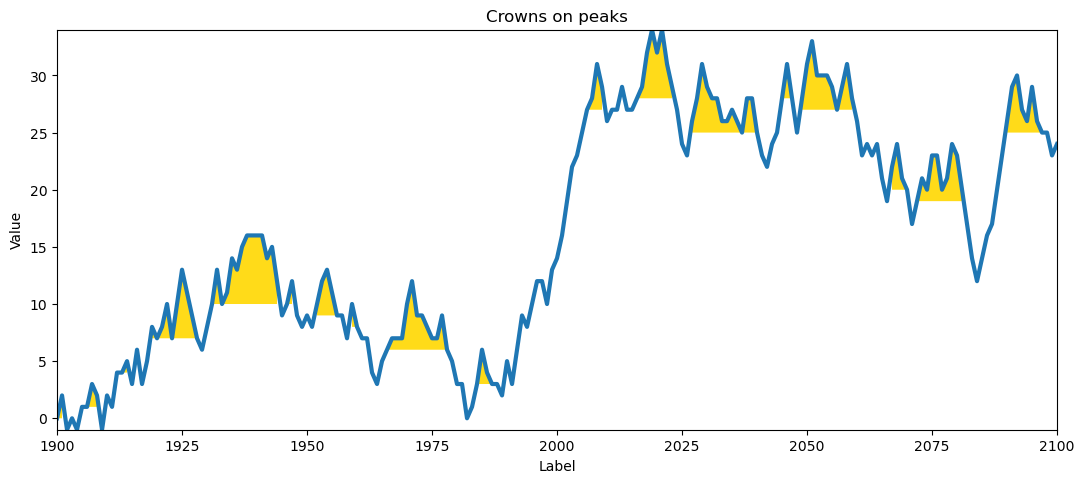

In [6]:
# Generate the data set:
X, Y = peakoscope.example_2(randomseed=RANDOM_SEED)
# Get the peak analysis results:
peaks = peakoscope.tree(Y)
# add plotting tools:
peakoscope.interface_matplotlib.TreeMatPlotLib(
    peaks,
    X=X,
    Y=Y,
    slice_of_x={n: n.subarray(X) for n in peaks},
    slice_of_y={n: n.subarray(Y) for n in peaks},
)

# Color the crown areas:
peaks.plot.crowns(peaks.size_filter(maxsize=7.0))

# Set title of the plot:
peaks.plot.ax.set_title('Crowns on peaks')
# Plot the data set as lines:
peaks.plot.ax.plot(X, Y, linewidth=3);

## The Arrows plot
The `peaks.plot.arrows` method plots the tree in vertices-and-edges style.

 Nodes in the tree are represented by points in the xy-plane. The coordinates are stored in a data attribute:
 - `peaks.plot.xy`. By default, the node's x-coordinate is `X[argext]` and the y-coordinate is the `cutoff`.

 `peaks.plot.arrows` iterates over each node in the input argument (or, if no argument is given, over all nodes in the tree). For each node, it draws an arrow from the parent of the node to the node. The arrow is not straight, but broken into a horizontal part followed by a vertcal part.
 
 The arrow color can be given as a keyword argument. Let us plot green and red arrows by calling `peaks.plot.arrows` twice: First, we plot main descendant nodes in green and then we plot lateral descendant nodes in red. The difference between main and lateral descendants is whether they have the same `argext` or not as their parents.

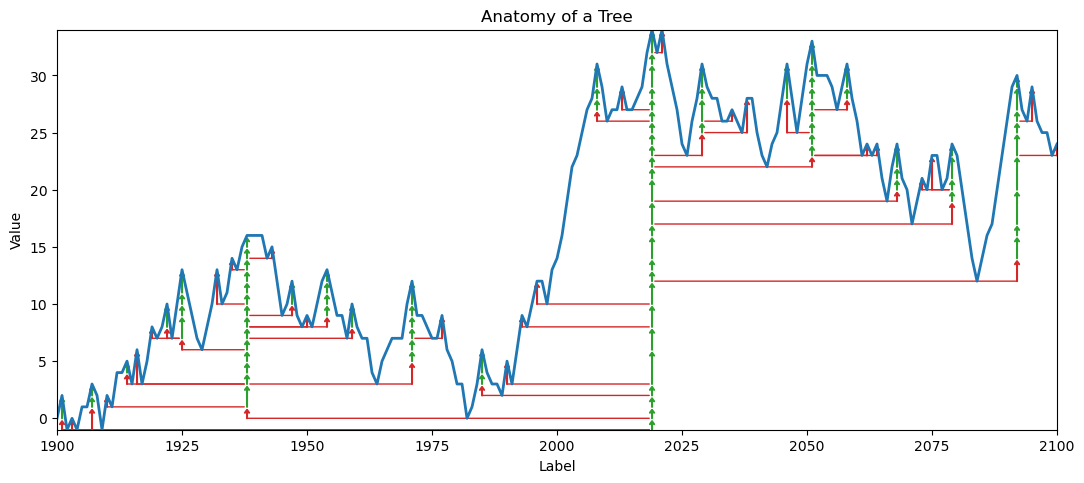

In [7]:
# Generate the data set:
X, Y = peakoscope.example_2(randomseed=RANDOM_SEED)
# Get the peak analysis results:
peaks = peakoscope.tree(Y)
# add plotting tools:
peakoscope.interface_matplotlib.TreeMatPlotLib(
    peaks,
    X=X,
    Y=Y,
)

(peaks.plot
 .new()
 # Plot green arrows to main descendant nodes:
 .arrows(peaks.main_descendants(), color='C2')
 # Plot red arrows to lateral descendant nodes:
 .arrows(peaks.lateral_descendants(), color='C3')
)

# Set title of the plot:
peaks.plot.ax.set_title('Anatomy of a Tree');
# Plot the data set as lines:
peaks.plot.ax.plot(X, Y, linewidth=2);

## The Pyramids Plot
The `peaks.plot.pyramids` method plots a horizontal bar for each peak.

On the x-axis, a bar spans the peak's location (stored in `peaks.plot.xinterval`).

On the y-axis, a bar is positioned at the peak's *level*, defined as the number of steps in the tree to the root. Levels are by default stored in the data attribute `peaks.plot.level`.

`peaks.plot.pyramids` iterates over each peak in the input argument. Here, we call it with no argument, to plot the whole tree. However, we give color as a keyword argument.


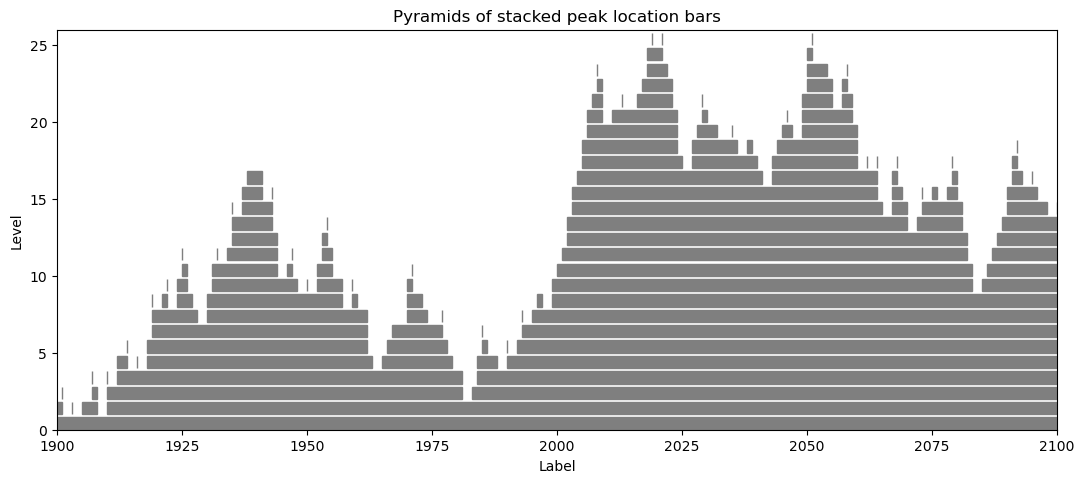

In [8]:
# Generate the data set:
X, Y = peakoscope.example_2(randomseed=RANDOM_SEED)
# Get the peak analysis results:
peaks = peakoscope.tree(Y)
# add plotting tools:
peakoscope.interface_matplotlib.TreeMatPlotLib(
    peaks,
    X=X,
    Y=Y,
)

# Plot the tree as stacked pyramids:
peaks.plot.pyramids(color='C7')

# Set title of the plot:
peaks.plot.ax.set_title('Pyramids of stacked peak location bars');
